In [1]:
from unityagents import UnityEnvironment
import numpy as np

In [2]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

plt.ion()

In [3]:
env = UnityEnvironment(file_name="Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


In [6]:
from dqn_agent import Agent
from model import QNetwork

# initialize the agent 
agent = Agent(state_size=state_size, action_size=action_size, qnetwork=QNetwork, update_type='dqn', seed=0)

In [7]:
def dqn(n_episodes, max_t, eps_start, eps_end, eps_decay):
    
    scores = []                                               # list containing scores from each episode                 
    scores_window = deque(maxlen=100)                         # store only the last 100 scores
    eps = eps_start                                           # initialize epsilon (for epsilon-greedy policy)
    
    for i_episode in range(1, n_episodes + 1):                # run n_episodes
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment
        state = env_info.vector_observations[0]               # get the initial state
        score = 0                                             # initialize the score
        
        for t in range(max_t):                                # run for maximum of max_t timesteps 
            action = agent.act(state, eps)                    # select the action
            env_info = env.step(action)[brain_name] 
            next_state = env_info.vector_observations[0]      # get the state
            reward = env_info.rewards[0]                      # get the reward
            done = env_info.local_done[0]                     # whether the episode is complete or not
            
            agent.step(state, action, reward, next_state, done)  # train the agent 
            score += reward                                      # update the score
            
            state = next_state                                   # update the state
            if done:                                             # break if episode is complete
                break
        
        scores_window.append(score)                # update the window of scores
        scores.append(score)                       # update the list of scores
        eps = max(eps_end, eps * eps_decay)        # modify epsilon
        average_score = np.mean(scores_window)
        print('\rEpisode {} \tAverage score: {: .2f}'.format(i_episode, average_score), end="")
        
        if i_episode % 100 == 0:
            print('\rEpisode {} \tAverage score: {: .2f}'.format(i_episode, average_score))
            
        if average_score >= 13:      # check if environment is solved
            print('\nEnvironment solved in {: d} episodes!\tAverage Score: {: .2f}'.format(i_episode - 100, average_score))
            torch.save(agent.qnetwork_local.state_dict(), 'output/dqn.pth')
            break
    
    return scores

In [8]:
n_episodes = 5000
max_t = 2000
eps_start = 1.0
eps_end = 0.1
eps_decay = 0.995

In [9]:
scores = dqn(n_episodes, max_t, eps_start, eps_end, eps_decay)

Episode 100 	Average score:  1.35
Episode 200 	Average score:  5.17
Episode 300 	Average score:  8.50
Episode 400 	Average score:  10.93
Episode 477 	Average score:  13.07
Environment solved in  377 episodes!	Average Score:  13.07


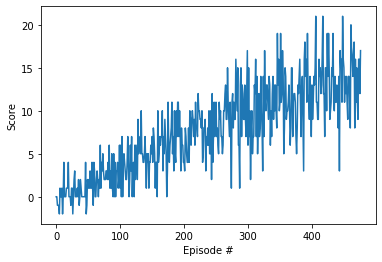

In [10]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [11]:
agent.qnetwork_local.load_state_dict(torch.load('output/dqn.pth'))